In [222]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

In [223]:
cars_df = pd.read_csv('data.csv')

In [224]:
# Display the top 5 rows

In [225]:
cars_df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [226]:
# Display the bottom 5 rows

In [227]:
cars_df.tail(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


In [228]:
# Checking the datatype

In [229]:
cars_df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [230]:
# Dropping irrelevant columns

In [231]:
cars_df = cars_df.drop(['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Popularity', 'Number of Doors', 'Vehicle Size'], axis=1)

In [232]:
cars_df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [233]:
# We can rename columns to improve readability

In [234]:
cars_df = cars_df.rename(columns={'Engine HP': 'HP', 'Engine Cylinders': 'Cylinders',
                                  'Transmission Type': 'Transmission', 'Driven_Wheels':
                                 'Drive Mode', 'highway MPG': 'MPG-H', 'city MPG': 'MPG-H',
                                 'MSRP':'Price'})

In [235]:
cars_df.head()

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,city mpg,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [236]:
# Total number of rows and columns
cars_df.shape

(11914, 10)

In [237]:
# Rows containing duplicate data
duplicate_rows_cars_df = cars_df[cars_df.duplicated()]
print('number of duplicated rows: ', duplicate_rows_cars_df.shape)

number of duplicated rows:  (989, 10)


In [238]:
# Count the number of rows before removing the duplicate data
cars_df.count()

Make            11914
Model           11914
Year            11914
HP              11845
Cylinders       11884
Transmission    11914
Drive Mode      11914
MPG-H           11914
city mpg        11914
Price           11914
dtype: int64

In [239]:
# Now we drop the duplicates
cars_df = cars_df.drop_duplicates()
cars_df.head()

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,city mpg,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [240]:
# Now we can count the remaining number of rows after having removed the duplicates
cars_df.count()

Make            10925
Model           10925
Year            10925
HP              10856
Cylinders       10895
Transmission    10925
Drive Mode      10925
MPG-H           10925
city mpg        10925
Price           10925
dtype: int64

In [241]:
# Finding the null values and how many of them there are in the dataset
print(cars_df.isnull().sum())

Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive Mode       0
MPG-H            0
city mpg         0
Price            0
dtype: int64


In [242]:
# Dropping the missing values
cars_df = cars_df.dropna()
cars_df.count()

Make            10827
Model           10827
Year            10827
HP              10827
Cylinders       10827
Transmission    10827
Drive Mode      10827
MPG-H           10827
city mpg        10827
Price           10827
dtype: int64

In [243]:
# Now we can check and see that the null values have been removed
print(cars_df.isnull().sum())

Make            0
Model           0
Year            0
HP              0
Cylinders       0
Transmission    0
Drive Mode      0
MPG-H           0
city mpg        0
Price           0
dtype: int64


In [244]:
# below are the box plots of Price, HP, Cylinders
# To explore and demonstrate the presence of outliers

<AxesSubplot:xlabel='Price'>

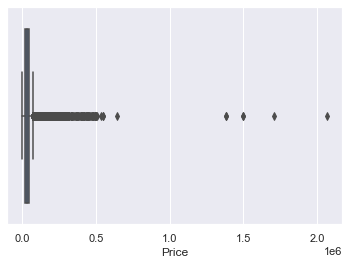

In [245]:
sns.boxplot(x=cars_df['Price'])

<AxesSubplot:xlabel='HP'>

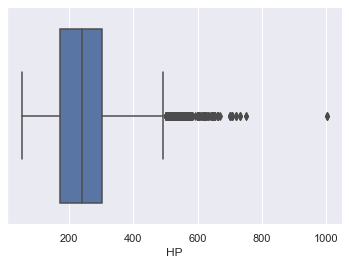

In [246]:
sns.boxplot(x=cars_df['HP'])

<AxesSubplot:xlabel='Cylinders'>

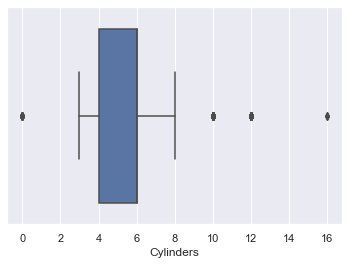

In [247]:
sns.boxplot(x=cars_df['Cylinders'])

In [248]:
#
Q1 = cars_df.quantile(0.25)
Q3 = cars_df.quantile(0.75)
IQR = Q3 - Q1

In [249]:
print(IQR)

Year             9.0
HP             130.0
Cylinders        2.0
MPG-H            8.0
city mpg         6.0
Price        21327.5
dtype: float64


In [250]:
cars_df = cars_df[~((cars_df < (Q1-1.5 * IQR)) |(cars_df > (Q3+1.5 * IQR))).any(axis=1)]
cars_df.shape

/var/folders/wp/lx570kfd2rvf4kqkn789qfnr0000gn/T/ipykernel_24782/349837524.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  cars_df = cars_df[~((cars_df < (Q1-1.5 * IQR)) |(cars_df > (Q3+1.5 * IQR))).any(axis=1)]


(9191, 10)

Text(0, 0.5, 'Number of cars')

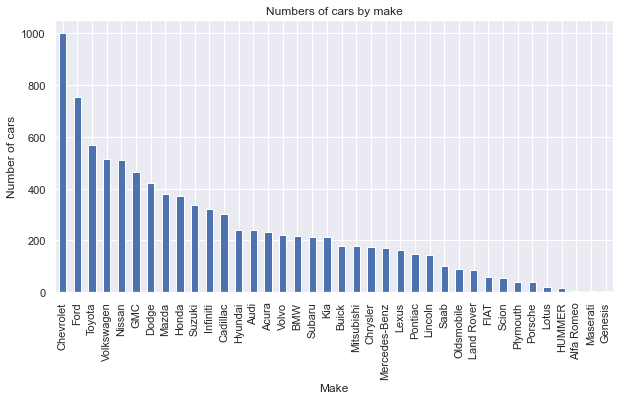

In [251]:
# Plotting a Histogram
cars_df.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title('Numbers of cars by make')
plt.xlabel('Make')
plt.ylabel('Number of cars')

,Year,HP,Cylinders,MPG-H,city mpg,Price
Year,1.000000,0.326726,-0.133920,0.378479,0.338145,0.592983
HP,0.326726,1.000000,0.715237,-0.443807,-0.544551,0.739042
Cylinders,-0.133920,0.715237,1.000000,-0.703856,-0.755540,0.354013
MPG-H,0.378479,-0.443807,-0.703856,1.000000,0.939141,-0.106320
city mpg,0.338145,-0.544551,-0.755540,0.939141,1.000000,-0.180515
Price,0.592983,0.739042,0.354013,-0.106320,-0.180515,1.000000


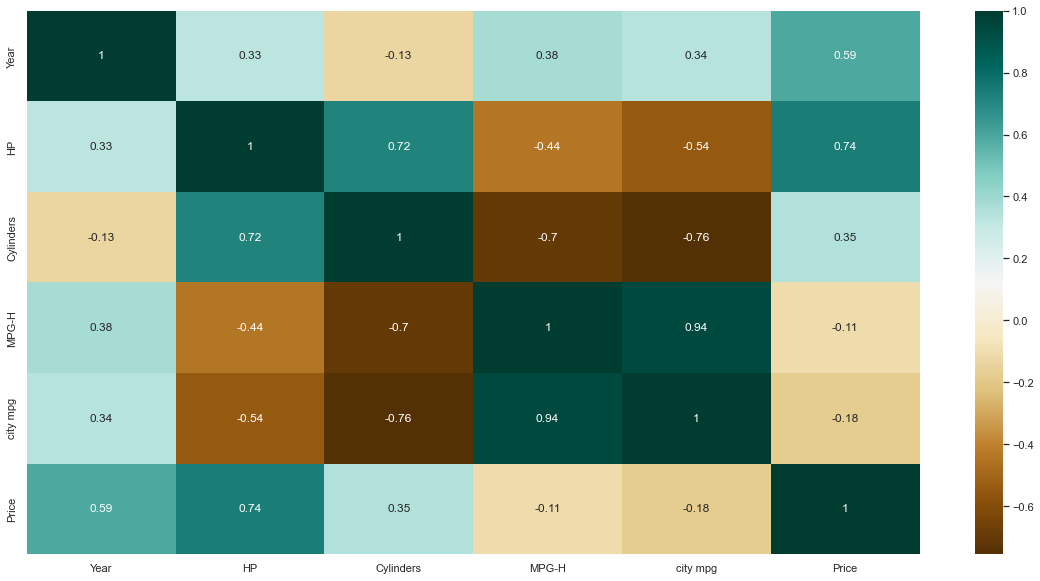

In [255]:
# We can use a heatmap to find the relations between the variables
plt.figure(figsize=(20,10))
c= cars_df.corr()
sns.heatmap(c, cmap='BrBG',annot=True)
c

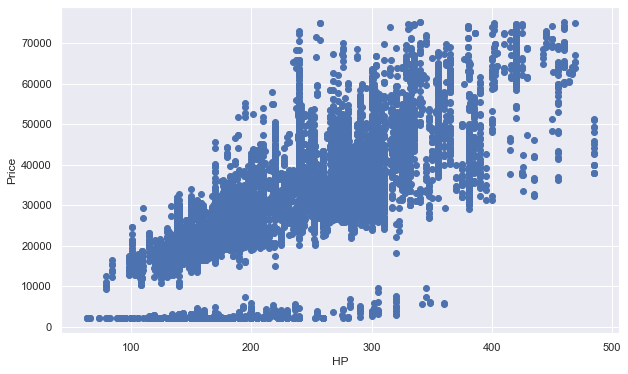

In [257]:
# Plotting a scatterplot
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(cars_df['HP'], cars_df['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()